In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv1D,LSTM,RepeatVector,TimeDistributed

In [3]:
df = pd.read_csv('./data/SPY.csv',parse_dates=['Date'],index_col=0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,112.370003,113.389999,111.510002,113.330002,92.246048,118944600
2010-01-05,113.260002,113.680000,112.849998,113.629997,92.490204,111579900
2010-01-06,113.519997,113.989998,113.430000,113.709999,92.555328,116074400
2010-01-07,113.500000,114.330002,113.180000,114.190002,92.946060,131091100
2010-01-08,113.889999,114.620003,113.660004,114.570000,93.255348,126402800


In [4]:
close = df.Close
close.shape

(2263,)

<AxesSubplot:title={'center':'Stock Price'}, xlabel='Date'>

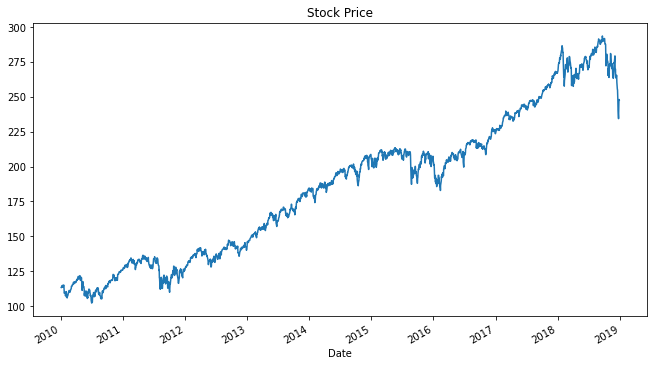

In [5]:
close.plot(figsize=(11,6), title='Stock Price')

In [6]:
Ntest = int(np.round(len(close)*0.3, 0))
Ntest

679

In [7]:
X_train = close[:-Ntest]
X_test = close[-Ntest:]

In [ ]:
# X= []
# Y= []
# series = X_train.to_numpy()
# for t in range(len(X_train)-1):
#     x = series[t:t+T]
#     y = series[t+T]
#     X.append(x)
#     Y.append(y)
    
# X = np.array(X).reshape(-1,1)
# Y = np.array(Y)

## LSTM AutoEncoder

In [14]:
model1 = Sequential()
model1.add(LSTM(128,input_shape=(1,1), return_sequences=True))
model1.add(LSTM(64,return_sequences=False))
model1.add(RepeatVector(1))
model1.add(LSTM(64,return_sequences=True))
model1.add(LSTM(128,return_sequences=True))
model1.add(TimeDistributed(Dense(1)))

model1.compile(loss='mse',optimizer='adam')
model1.summary()
           

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 1, 128)            66560     
                                                                 
 lstm_7 (LSTM)               (None, 64)                49408     
                                                                 
 repeat_vector_2 (RepeatVect  (None, 1, 64)            0         
 or)                                                             
                                                                 
 lstm_8 (LSTM)               (None, 1, 64)             33024     
                                                                 
 lstm_9 (LSTM)               (None, 1, 128)            98816     
                                                                 
 time_distributed_1 (TimeDis  (None, 1, 1)             129       
 tributed)                                            

In [15]:
hist = model1.fit(X_train,X_train,epochs=100, batch_size = 20, validation_data=(X_test,X_test))

Epoch 1/100
80/80 [==============================] - 20s 58ms/step - loss: 23945.6836 - val_loss: 52717.4375
Epoch 2/100
80/80 [==============================] - 1s 15ms/step - loss: 19270.1777 - val_loss: 48205.2461
Epoch 3/100
80/80 [==============================] - 1s 14ms/step - loss: 16900.5117 - val_loss: 44583.8867
Epoch 4/100
80/80 [==============================] - 1s 15ms/step - loss: 14927.8867 - val_loss: 41364.0508
Epoch 5/100
80/80 [==============================] - 1s 16ms/step - loss: 13204.0566 - val_loss: 38435.6484
Epoch 6/100
80/80 [==============================] - 1s 18ms/step - loss: 11672.7383 - val_loss: 35732.6055
Epoch 7/100
80/80 [==============================] - 1s 15ms/step - loss: 10308.3203 - val_loss: 33254.3984
Epoch 8/100
80/80 [==============================] - 1s 17ms/step - loss: 9092.0527 - val_loss: 30966.8711
Epoch 9/100
80/80 [==============================] - 1s 14ms/step - loss: 8006.6875 - val_loss: 28839.6973
Epoch 10/100
80/80 [=========

80/80 [==============================] - 1s 14ms/step - loss: 1213.0129 - val_loss: 8496.0537
Epoch 78/100
80/80 [==============================] - 1s 15ms/step - loss: 1213.2603 - val_loss: 8470.1279
Epoch 79/100
80/80 [==============================] - 1s 14ms/step - loss: 1213.2294 - val_loss: 8449.6973
Epoch 80/100
80/80 [==============================] - 1s 15ms/step - loss: 1213.3396 - val_loss: 8471.0098
Epoch 81/100
80/80 [==============================] - 2s 22ms/step - loss: 1213.1262 - val_loss: 8464.6709
Epoch 82/100
80/80 [==============================] - 2s 23ms/step - loss: 1213.0298 - val_loss: 8492.5391
Epoch 83/100
80/80 [==============================] - 1s 15ms/step - loss: 1213.1182 - val_loss: 8488.2832
Epoch 84/100
80/80 [==============================] - 1s 14ms/step - loss: 1212.9576 - val_loss: 8518.2676
Epoch 85/100
80/80 [==============================] - 1s 14ms/step - loss: 1212.9785 - val_loss: 8503.3320
Epoch 86/100
80/80 [==============================

In [18]:
hist.history['loss']

[23945.68359375,
 19270.177734375,
 16900.51171875,
 14927.88671875,
 13204.056640625,
 11672.73828125,
 10308.3203125,
 9092.052734375,
 8006.6875,
 7040.61669921875,
 6188.46533203125,
 5436.876953125,
 4778.13720703125,
 4203.982421875,
 3705.347900390625,
 3272.607666015625,
 2904.760009765625,
 2590.0576171875,
 2325.563232421875,
 2103.791259765625,
 1918.8773193359375,
 1766.5220947265625,
 1643.906982421875,
 1544.7366943359375,
 1464.1585693359375,
 1401.2237548828125,
 1352.058349609375,
 1314.97412109375,
 1286.8436279296875,
 1265.9066162109375,
 1249.90771484375,
 1238.4129638671875,
 1230.2823486328125,
 1224.537109375,
 1220.5489501953125,
 1217.609619140625,
 1215.8629150390625,
 1214.811279296875,
 1214.020751953125,
 1213.482177734375,
 1213.3065185546875,
 1212.9940185546875,
 1212.84716796875,
 1213.2884521484375,
 1212.8572998046875,
 1212.95166015625,
 1213.0106201171875,
 1212.7901611328125,
 1212.7391357421875,
 1212.7728271484375,
 1212.7757568359375,
 1212.813

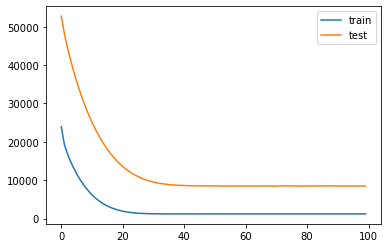

In [23]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label= 'test')
plt.legend()

In [37]:
preds = model1.predict(X_test)

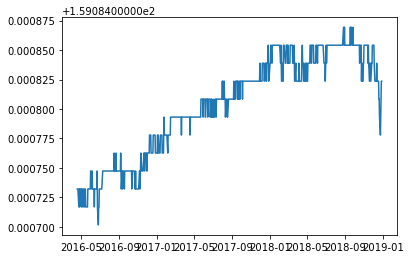

In [39]:
plt.plot(X_test.index,preds.flatten())

In [ ]:
mean_squared_error(X_test, preds, squared=False )

## CNN AutoEncoder

In [ ]:
model2 = Sequential()
model2.add(Conv1D(64,input_shape=()))